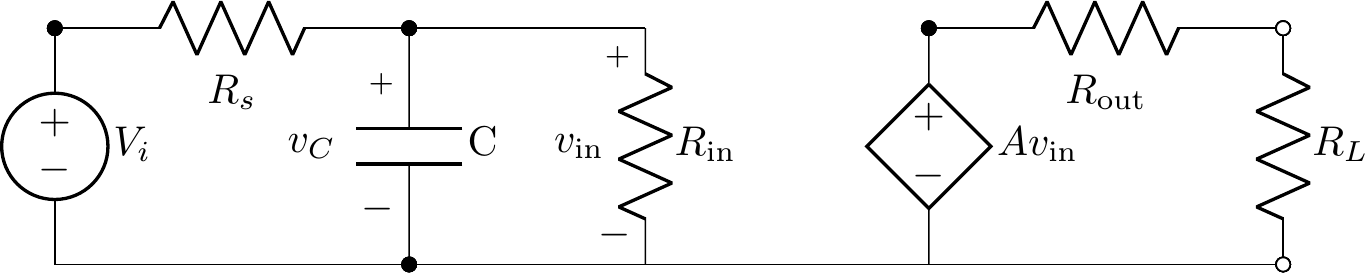

In [1]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
Rs 1 2; right=1.5
C 2 0; down, v=v_C
W 0_1 0; right
W 0 0_2; right
Rin 2_2 0_2; down, v=v_{in}
W 2 2_2; right
E1 3 0_3 2 0 A; down, l=A v_{in}
Rout 3 4; right=1.5
RL 4 0_4; down
W 0_2 0_3; size=1.2
W 0_3 0_4
P1 4 0_4; down
""")
cct.draw()

In [2]:
H = cct['RL'].V(s) / cct['Vi'].V(s)
H(j * omega)

                  ⅉ⋅A⋅R_L⋅ω                   
──────────────────────────────────────────────
⎛   2   ⅉ⋅ω⋅(Rᵢₙ + Rₛ)⎞                       
⎜- ω  + ──────────────⎟⋅(C⋅R_L⋅Rₛ + C⋅Rₒᵤₜ⋅Rₛ)
⎝          C⋅Rᵢₙ⋅Rₛ   ⎠                       

In [3]:
H(j * omega).magnitude


                  A⋅R_L⋅Rᵢₙ                   
──────────────────────────────────────────────
                ______________________________
               ╱  2    2   2  2             2 
(R_L + Rₒᵤₜ)⋅╲╱  C ⋅Rᵢₙ ⋅Rₛ ⋅ω  + (Rᵢₙ + Rₛ)  

In [4]:
H(j * omega).phase_degrees

         ⎛C⋅Rᵢₙ⋅Rₛ⋅ω⎞ 
-180⋅aₜₐₙ⎜──────────⎟ 
         ⎝ Rᵢₙ + Rₛ ⎠ 
──────────────────────
          π           

In [5]:

H1 = H.subs({'C': 1e-9, 'Rs': 25e3, 'RL': 5e3, 'Rin' : 500e3, 'Rout' : 1e3, 'A' : 2})
H1(j * omega)

     200000⋅ⅉ⋅ω     
────────────────────
  ⎛   2            ⎞
3⋅⎝- ω  + 42000⋅ⅉ⋅ω⎠

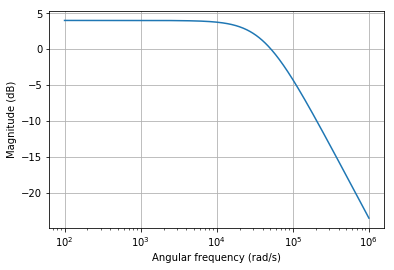

In [6]:
from numpy import logspace
w = logspace(2, 6, 500)
%matplotlib inline
ax = H1(j * omega).dB.plot(w, log_frequency=True)

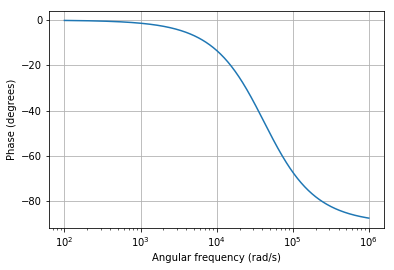

In [7]:
ax = H1(j * omega).phase_degrees.plot(w, log_frequency=True)